## Prediction of income of a person whose income >50K and <=50K

In [0]:
from google.colab import files
uploaded = files.upload()


Saving adult.csv to adult.csv


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [0]:
df = pd.read_csv("adult.csv",na_values='?')


In [0]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [0]:
y = df['income']

In [0]:
data.iloc[:,-1].head()

0    United-States
1    United-States
2    United-States
3    United-States
4    United-States
Name: native-country, dtype: object

In [0]:
data = df.iloc[:,:-1]

In [0]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [0]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [0]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [0]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

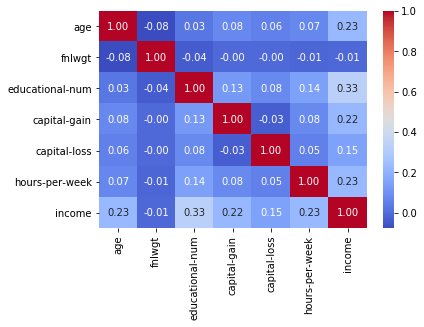

In [0]:
# Correlation matrix between numerical values
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [0]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [0]:
df.shape

(48842, 15)

In [0]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [0]:
data['workclass'].fillna('0',inplace=True)

In [0]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

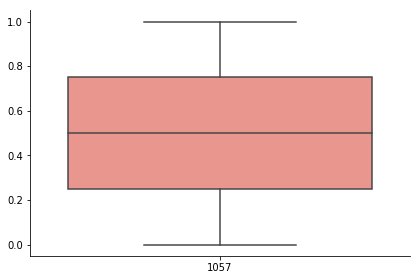

In [0]:
sns.catplot(x='fnlwgt', y='income', 
            data=df,
            kind='box',
            height=4, aspect=1.5)


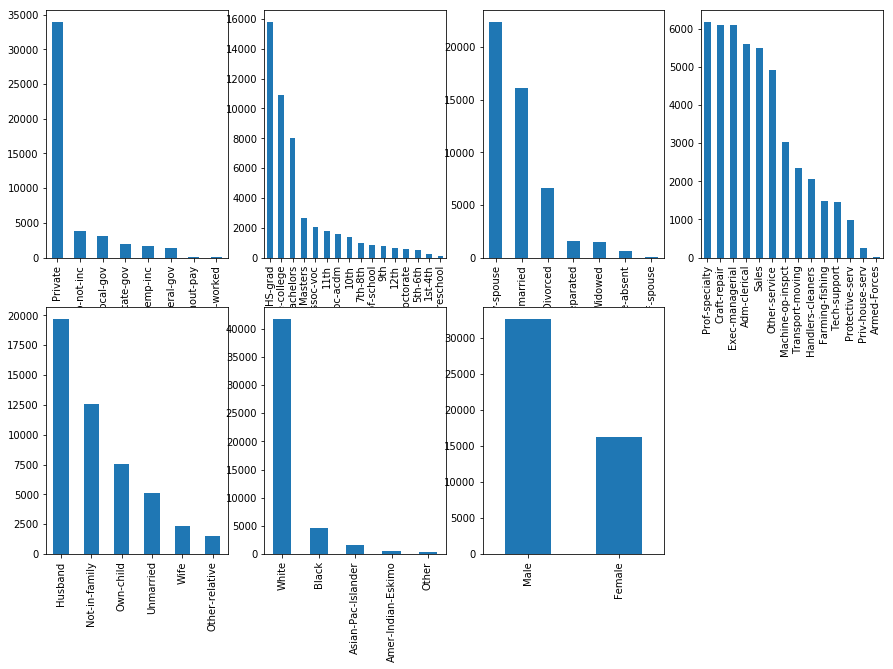

In [0]:
plt.figure(figsize=(15,10))
for i in range(0,len(cat_features)-1):
  plt.subplot(2,4,i+1)
  df[df[cat_features].columns[i]].value_counts().plot(kind='bar')
  plt.xticks(rotation=90)

In [0]:
len(cat_features)

8

In [0]:
df[cat_features].columns[0]

'workclass'

In [0]:
ax =plt.subplots(1,2)

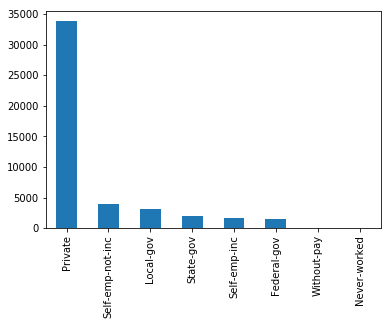

In [0]:
df["workclass"].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

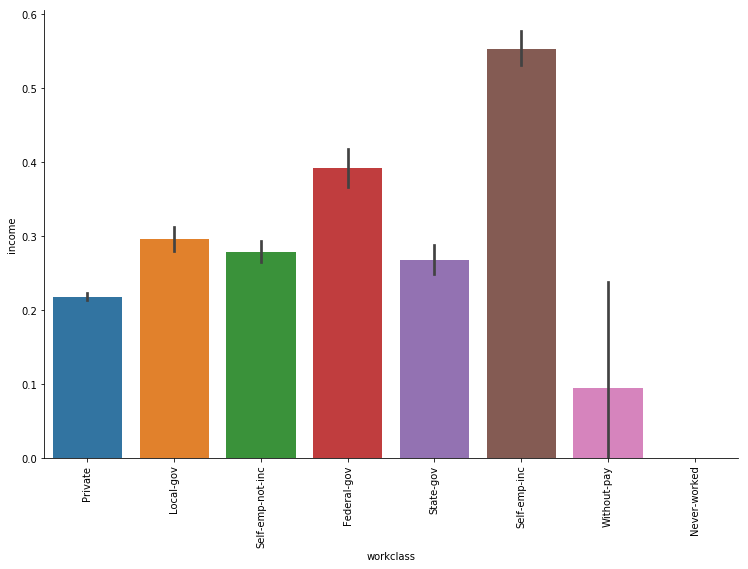

In [0]:
sns.catplot(x='workclass',y='income',data=df,kind = 'bar',height=7,aspect=1.5 )
plt.xticks(rotation=90)

In [0]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
0                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [0]:
data['workclass'].replace('Without-pay','Never-worked',inplace = True)

In [0]:
df['fnlwgt']= df['fnlwgt'].apply(lambda x: np.log1p(x))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

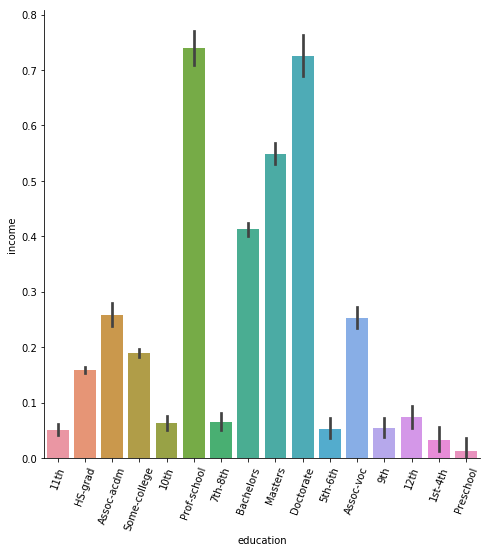

In [0]:
sns.catplot(x='education',y='income',data=df,kind = 'bar',height=7)
plt.xticks(rotation=70)

In [0]:
def primary(x):
  if x in ['1st-4th','5th-6th','7th-8th','9th','10th']:
    return 'Primary_school'
  else:
    return x

In [0]:
data['education'] = data['education'].apply(primary)

In [0]:
def secondary(x):
  if x in ['11th','12th']:
    return 'HS-grad'
  else:
    return x

In [0]:
data['education']= data['education'].apply(secondary )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

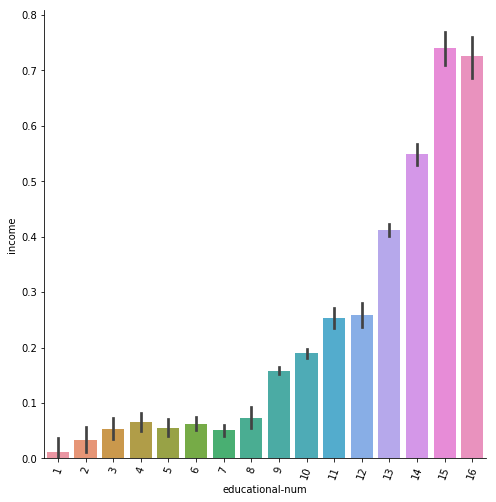

In [0]:
sns.catplot(x='educational-num',y='income',data=df,kind = 'bar',height=7)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

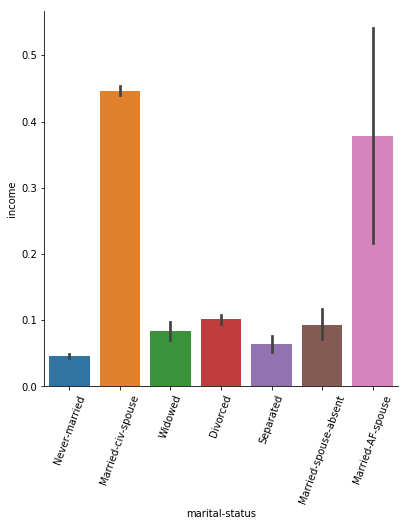

In [0]:
sns.catplot(x='marital-status',y='income',data=df,kind = 'bar',height=6)
plt.xticks(rotation=70)

In [0]:
data['marital-status'].replace('Married-AF-spouse','Married-civ-spouse',inplace=True)

In [0]:
data['occupation'].fillna('0',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

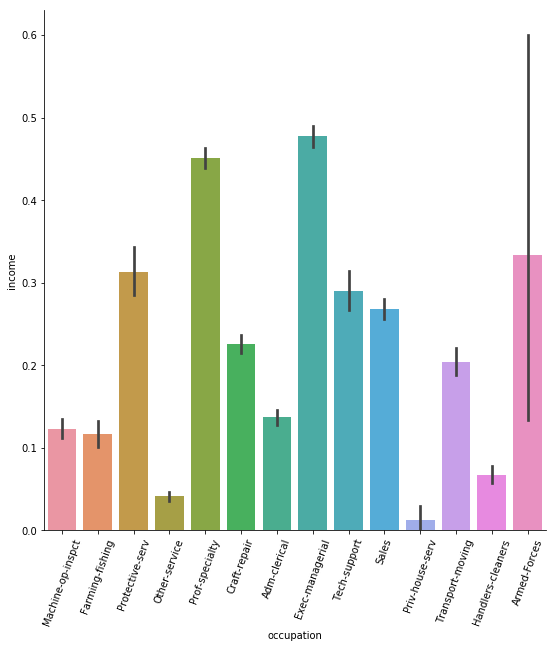

In [0]:
sns.catplot(x='occupation',y='income',data=df,kind = 'bar',height=8)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

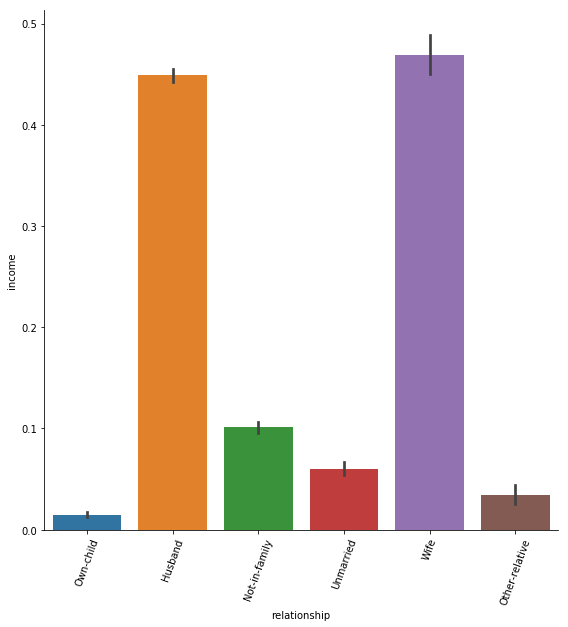

In [0]:
sns.catplot(x='relationship',y='income',data=df,kind = 'bar',height=8)
plt.xticks(rotation=70)

In [0]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

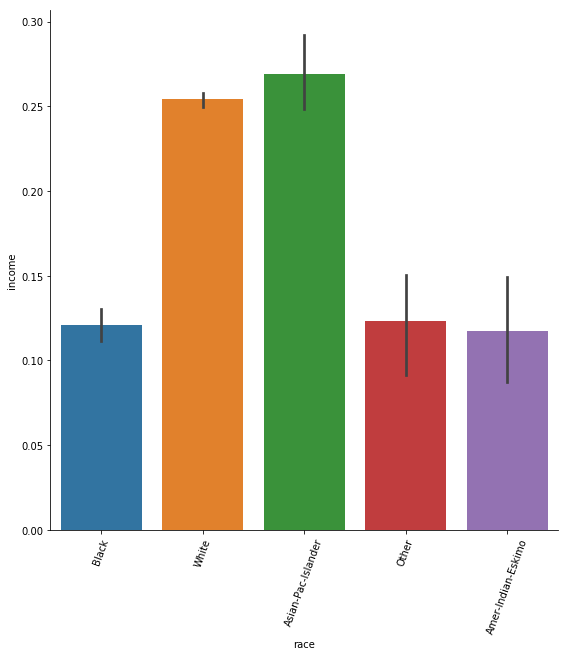

In [0]:
sns.catplot(x='race',y='income',data=df,kind = 'bar',height=8)
plt.xticks(rotation=70)

In [0]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

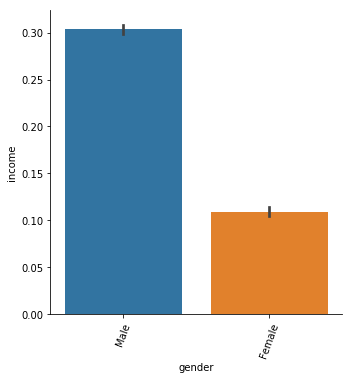

In [0]:
sns.catplot(x='gender',y='income',data=df,kind = 'bar',height=5)
plt.xticks(rotation=70)

In [0]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [0]:
data['native-country'].fillna('0',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

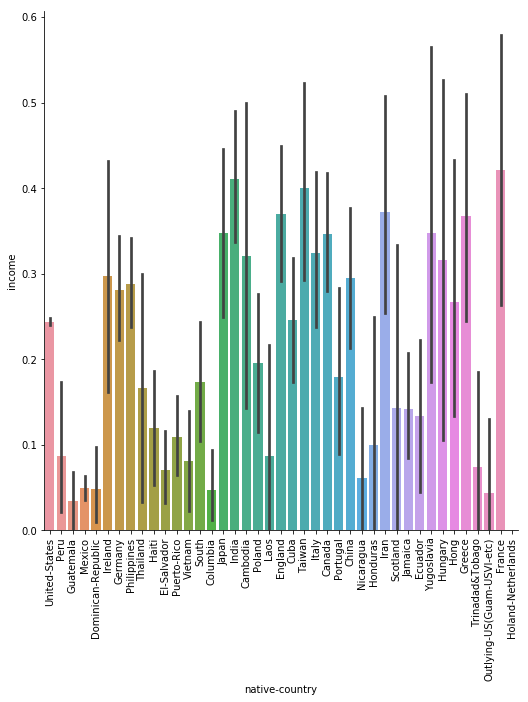

In [0]:
sns.catplot(x='native-country',y='income',data=df,kind = 'bar',height=8)
plt.xticks(rotation=90)

In [0]:
le = LabelEncoder()
data['native-country'] = le.fit_transform(data['native-country'])


In [0]:
data.dtypes=='object'

age                False
workclass           True
fnlwgt             False
education           True
educational-num    False
marital-status      True
occupation          True
relationship        True
race                True
gender              True
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
dtype: bool

In [0]:
cat_features = data.select_dtypes(include=['object'])

In [0]:
for col in cat_features:
    print (col, data[col].nunique())

workclass 8
education 10
marital-status 6
occupation 15
relationship 6
race 5
gender 2


In [0]:
#one-hot encode
for col in cat_features:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, prefix_sep=':')], axis=1)
    data.drop(col, axis=1, inplace=True)

In [0]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,workclass:0,workclass:Federal-gov,workclass:Local-gov,...,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,gender:Female,gender:Male
0,25,12.331837,7,0,0,40,39,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,11.405507,9,0,0,50,39,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12.727696,12,0,0,40,39,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,11.984952,10,7688,0,40,39,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,11.547308,10,0,0,30,39,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [0]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 0)

In [0]:
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced',solver='liblinear')

lrn.fit(X_train, y_train)
Y_pred = lrn.predict(X_test)
data1=(confusion_matrix(y_test,Y_pred))
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
print("Confusion Matrix")
cf_df

Confusion Matrix


,Predicted No,Predicted Yes
Actual No,5826,1594
Actual yes,439,1910


In [0]:
acc = accuracy_score(y_test, Y_pred)

print ("Logistic Regression Approach")
print("Model Accuracy: ",acc*100.0)
precision= precision_score(y_test, Y_pred, average= "weighted")  
print("Model precision:", precision*100)
print("recall score:", recall_score(y_test, Y_pred, average='weighted')*100)

scores = cross_val_score(lrn, X_test, y_test, cv=5)
scores

Logistic Regression Approach
Model Accuracy:  79.75227761285699
Model precision: 84.05229681833316
recall score: 79.75227761285699


array([0.78710338, 0.79119754, 0.79529171, 0.79938588, 0.79467486])

In [0]:
lrn = LogisticRegression(penalty = 'l2', C = .001, class_weight='balanced',solver='liblinear')

lrn.fit(X_train, y_train)
Y_pred = lrn.predict(X_test)
data1=(confusion_matrix(y_test,Y_pred))
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
print("Confusion Matrix")
cf_df

Confusion Matrix


,Predicted No,Predicted Yes
Actual No,5875,1545
Actual yes,433,1916
